# Módulo 10 atividade 1

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [43]:
prev = pd.read_csv('previsao_de_renda.csv')
prev.head()

Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36       3.575342                    3.0  False  3369.24  
1     42       0.860274                    2.0  False  6096.14  
2     31       8.065753                    4.0  False  5658.98  
3     50       1.208219                    2.0  False  7246.69  
4     52      13.873973                    2.0  False  4017.37

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

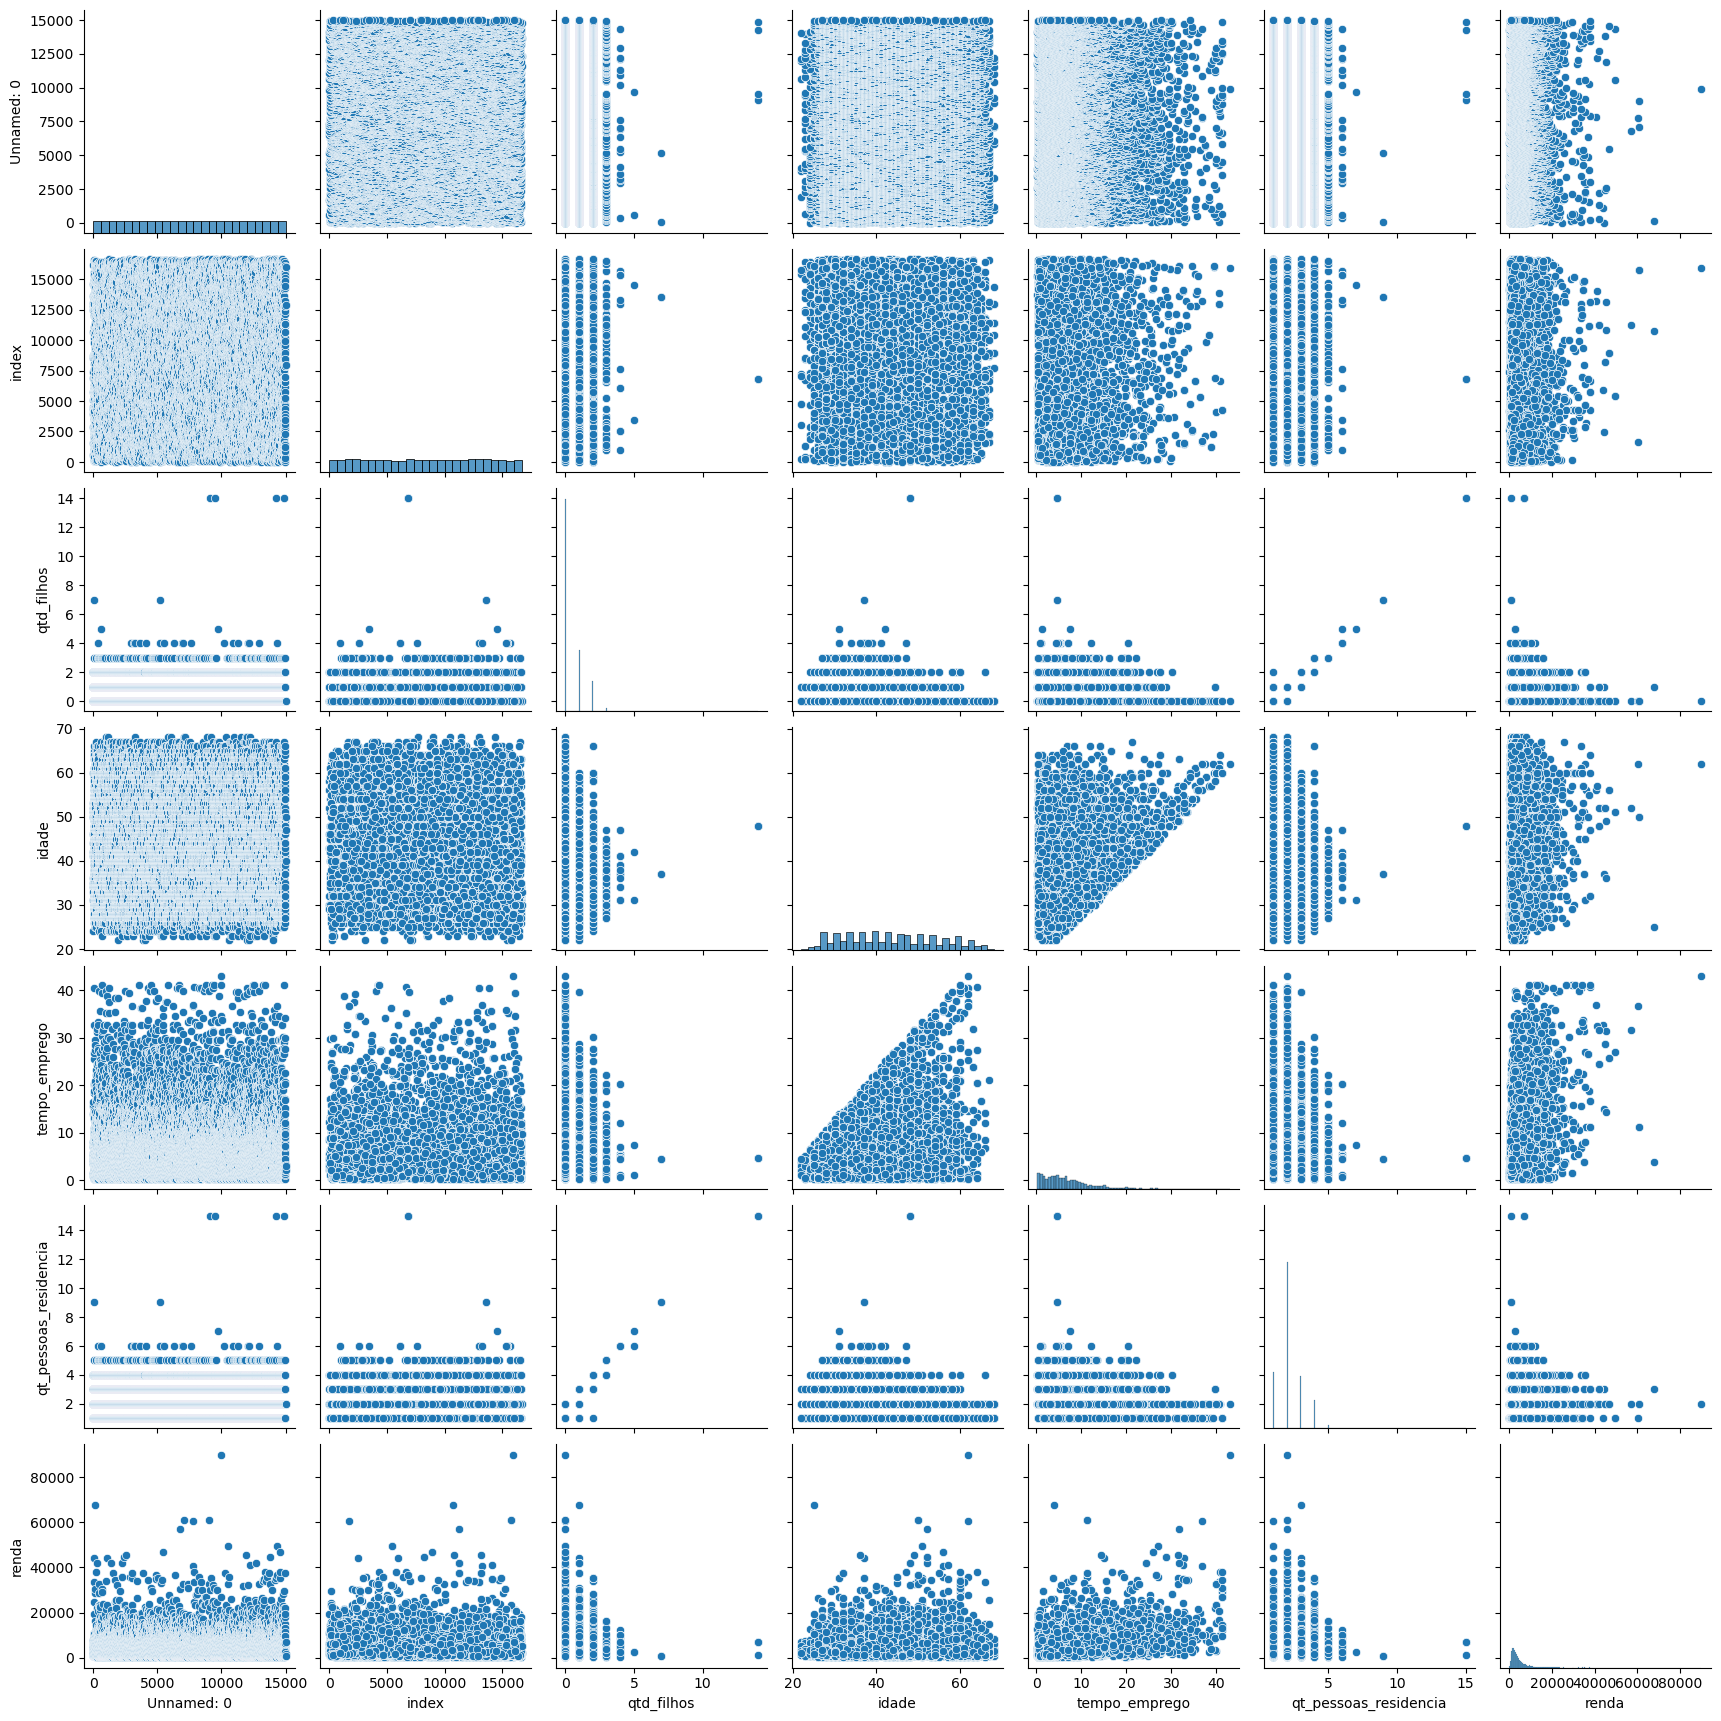

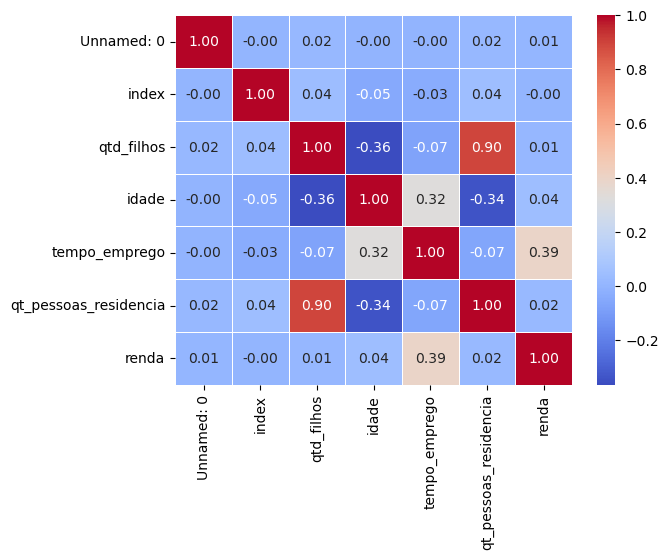

In [44]:
quantitative_vars = prev.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(prev[quantitative_vars])
plt.show()
correlation_matrix = prev[quantitative_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

- renda, tempo_emprego e idade são as variaveis com maior corelação. O que faz sentido em muitos  aspectos.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

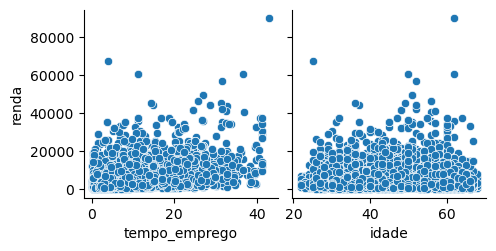

In [33]:
top_correlations = correlation_matrix['renda'].sort_values(ascending=False).index[1:3]
sns.pairplot(prev, x_vars=top_correlations, y_vars='renda', kind='scatter')
plt.show()

3) Na sua opinião, há outliers na variável renda?

Sim, a maioria dos dados esta agruapada e apenas poucos fogem desse grupo.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

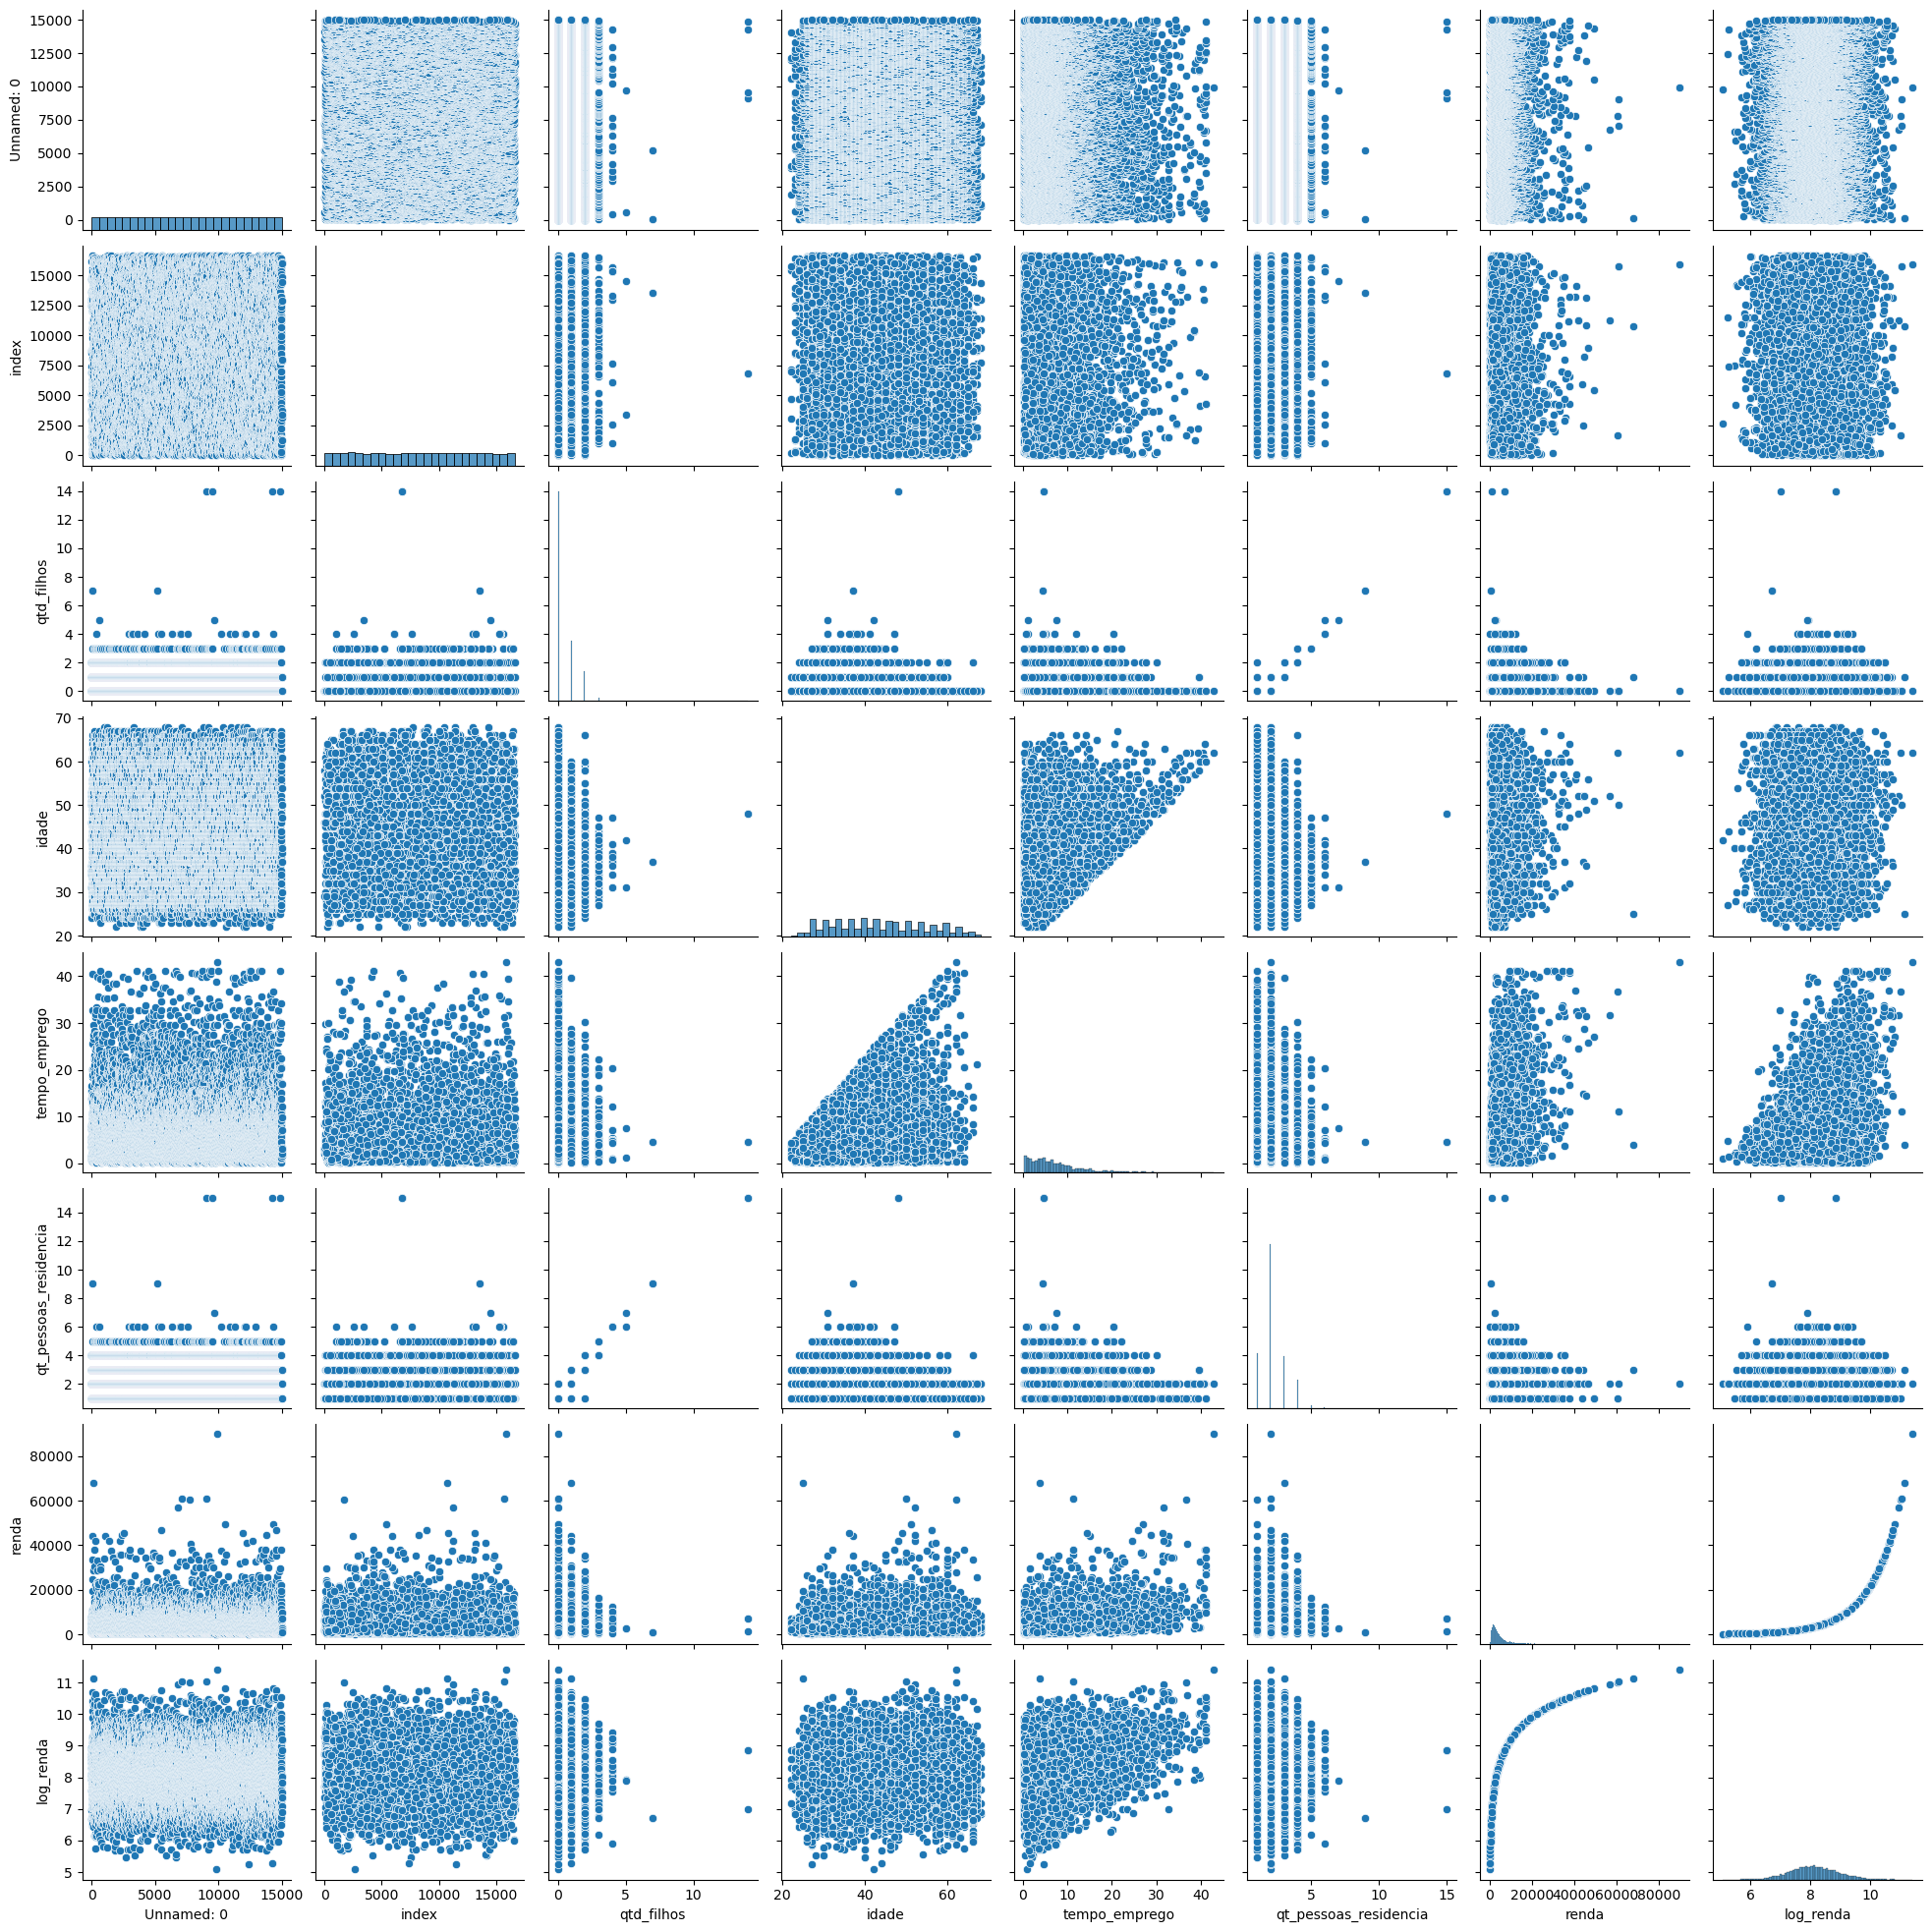

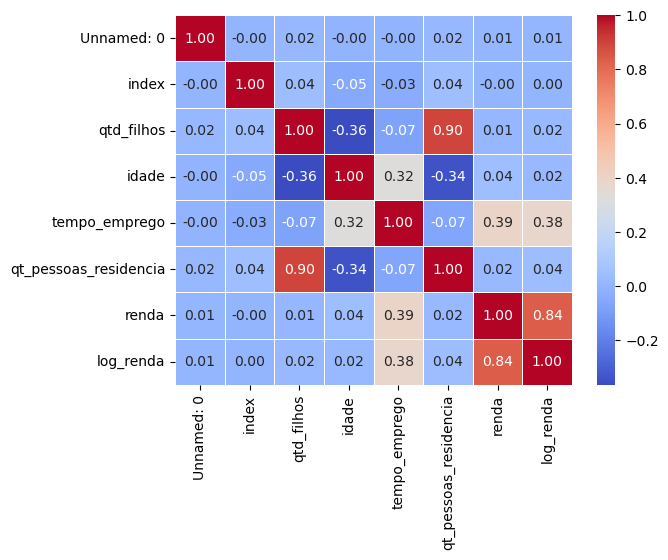

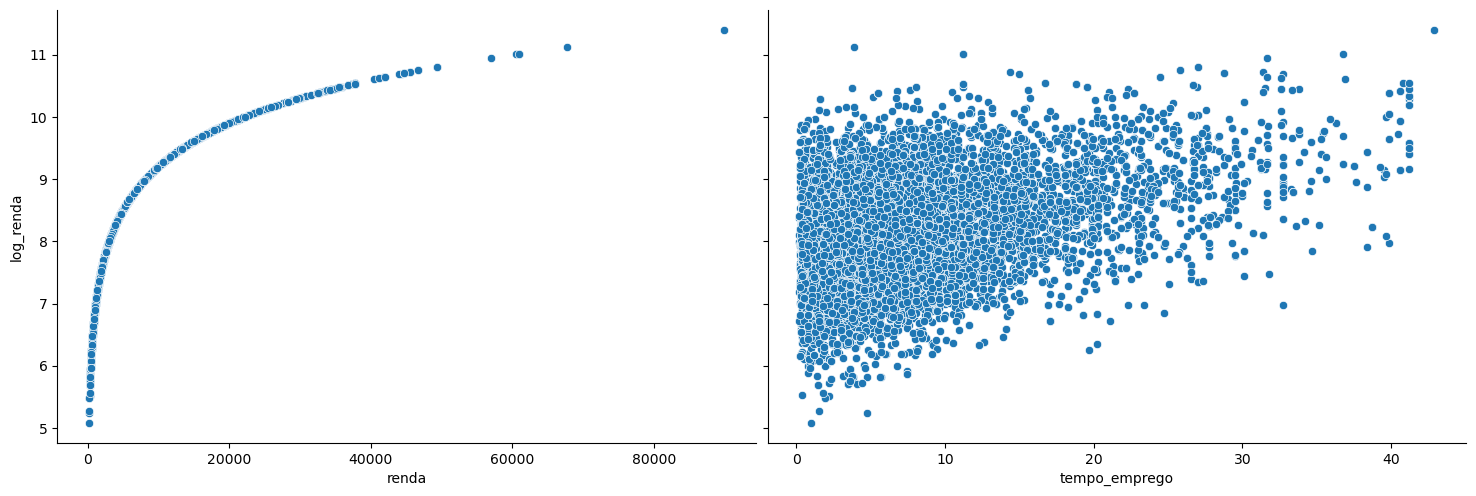

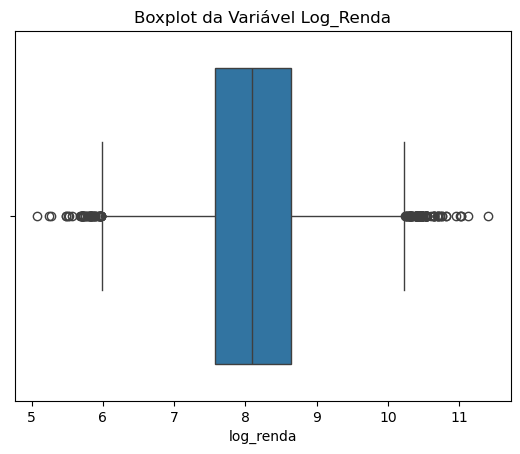

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cálculo do logaritmo da variável 'renda'
prev['log_renda'] = np.log1p(prev['renda'])

# Seleção das variáveis quantitativas incluindo a nova variável 'log_renda'
quantitative_vars = prev.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'log_renda' not in quantitative_vars:
    quantitative_vars.append('log_renda')  # Adiciona 'log_renda' à lista de variáveis quantitativas

# Matriz de dispersão
sns.pairplot(prev, vars=quantitative_vars)
plt.show()

# Recalcula a matriz de correlações incluindo a nova variável 'log_renda'
correlation_matrix = prev[quantitative_vars].corr()

# Matriz de correlações
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()

# Seleção das variáveis mais correlacionadas com 'log_renda'
top_correlations = correlation_matrix['log_renda'].sort_values(ascending=False)[1:3].index.tolist()

# Gráfico de dispersão para as variáveis mais correlacionadas com 'log_renda'
sns.pairplot(prev, x_vars=top_correlations, y_vars='log_renda', kind='scatter', height=5, aspect=1.5)
plt.show()

# Boxplot da variável 'log_renda'
sns.boxplot(x=prev['log_renda'])
plt.title('Boxplot da Variável Log_Renda')
plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Sim, a aplicação do log parece ter impactado a análise das variáveis positivamente.